In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid', {'axis.edgecolor': '0.2',
                           'xtick.bottom': True,
                           'ytick.bottom': True,
                          })
%matplotlib inline

In [2]:
def get_num_atoms(smi):
    mol = Chem.MolFromSmiles(smi)
    return mol.GetNumAtoms()

In [3]:
def get_MW(smi):
    mol = Chem.MolFromSmiles(smi)
    return Descriptors.MolWt(mol)

In [5]:
# df_train = pd.read_csv('gen_model/lipo_cleaned.smi', names=['SMILES'])
df_train = pd.read_csv('pred_models/rf_lipo_preds.csv')
df_train['num_atoms'] = df_train.SMILES.apply(get_num_atoms)
df_train['molecular_weight'] = df_train.SMILES.apply(get_MW)
df_train

,SMILES,split,lipo_true,lipo_pred,num_atoms,molecular_weight
0,COCCNCc1ccc(CCNCC(O)c2ccc(O)c3[nH]c(=O)sc23)cc1,train,-0.54,-0.169700,29,417.531
1,CCCC(CN1CCCC1)N(C)C(=O)Cc1ccc(Cl)c(Cl)c1,train,2.27,2.305028,23,357.325
2,C#CC(C)n1c(=O)c2c(-c3cncn3C)n(Cc3ccnc4ccc(Cl)c...,train,3.59,3.564750,37,513.989
3,O=C1Nc2ccc(S(=O)(=O)N3CCCC3CNc3ccccc3)cc2C1=O,train,2.40,2.453015,27,385.445
4,N#Cc1cnn2c(N)cc(-c3cccs3)nc12,train,2.30,2.263371,17,241.279
...,...,...,...,...,...,...
4092,COc1cc2ncnc(Oc3cnn(CC(=O)Nc4ccc(N(C)C)cn4)c3)c...,test,2.36,2.649242,33,449.471
4093,O=C(NC(Cc1ccc(N2CCN(c3ccccc3)CC2)cc1)C(=O)O)c1...,test,0.08,1.075967,34,498.410
4094,CCNC(=O)Nc1nc2cc(-c3cccnc3)ccc2[nH]1,test,2.34,2.677532,21,281.319
4095,N#Cc1c(-c2ccc(-c3ccccc3OC(F)(F)F)cc2)nc2ccncc2c1O,test,3.45,3.044362,30,407.351


In [7]:
df_gen = pd.read_csv('gen_model/generated_smiles_prior.csv')
df_gen['num_atoms'] = df_gen.SMILES.apply(get_num_atoms)
df_gen['molecular_weight'] = df_gen.SMILES.apply(get_MW)
df_gen

,SMILES,inchi_key,rf_lipo,num_atoms,molecular_weight
0,Cc1ccc(C#N)cc1C(=NCN1CCCOC1)c1ccccc1,AABMWSHEWZJFJV-UHFFFAOYSA-N,2.273767,24,319.408
1,CC(CCc1ccccc1)NC(C)S(=O)(=O)c1ccc(OCc2ccccc2)cc1,AAIJTQZUBZOWJZ-UHFFFAOYSA-N,2.291067,30,423.578
2,O=C(O)CCC(=O)Nc1cc(CCc2ccccc2)n[nH]c1=O,AAISTNJXSFALDF-UHFFFAOYSA-N,0.186741,23,315.329
3,NC(=O)C(CCc1ccc(OCCCNc2ccccn2)cc1)C(F)(F)F,AAIVTQTUVUVWJA-UHFFFAOYSA-N,2.923300,27,381.398
4,OCCN1CCN(CCCc2c[nH]c(-c3ccccc3)n2)CC1,AAJXWLZJARCQRQ-UHFFFAOYSA-N,1.695130,23,314.433
...,...,...,...,...,...
1998,CNC(C)C(N)N1CCC(OC(=O)C(O)c2ccccc2)CC1,ZYGLLBBSQAZGNE-UHFFFAOYSA-N,0.907309,23,321.421
1999,CS(=O)(=O)c1cnc(N2CCN(C(=O)Nc3ccccc3Cl)CC2)c(F)c1,ZYHKNEZYLIFDNW-UHFFFAOYSA-N,2.573367,27,412.874
2000,CCCNc1nc(N2CCCC(C(=O)O)C2)ccc1C(=O)NC1CCCCC1,ZYPNXQUBUDHYEW-UHFFFAOYSA-N,0.892567,28,388.512
2001,Cc1cc(F)c(Cl)c(Nc2cc(C(=O)N3CCOCC3)cc(N3CCOCC3...,ZZBCGDCXFCMVKR-UHFFFAOYSA-N,3.066878,30,434.899


In [8]:
sns.set_style('darkgrid', {'axis.edgecolor': 'black',
                           'axes.linewidth': 2,
                           'xtick.bottom': True,
                           'ytick.bottom': True,
                          })

Visually confirm that the generated molecules are sampled from the same distribution as the training set

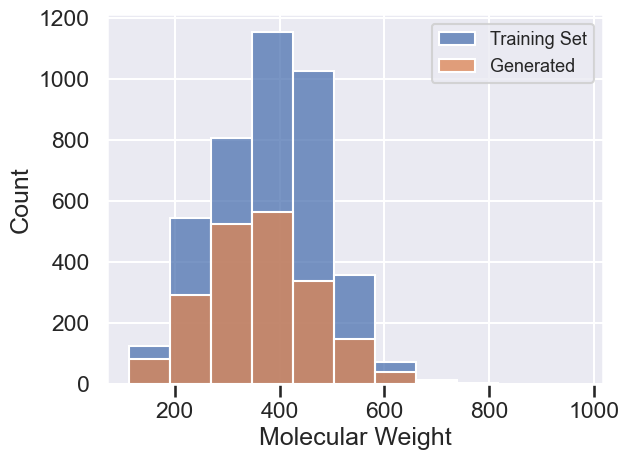

In [9]:
target = 'molecular_weight'
bins = np.histogram_bin_edges(df_train[target], bins=11)
ax = sns.histplot(x=df_train[target], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen[target], bins=bins, label='Generated')

ax.set_xlabel('Molecular Weight')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

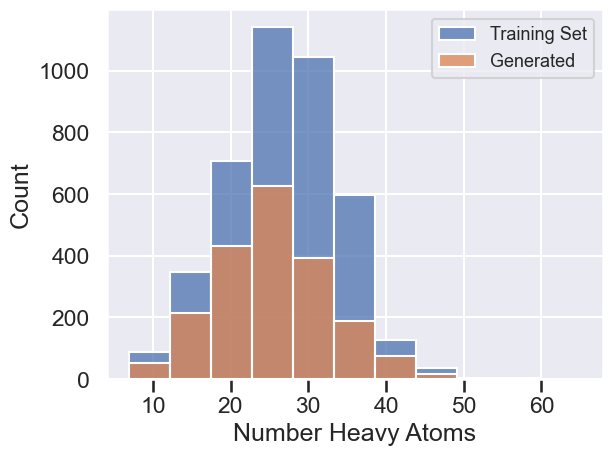

In [10]:
target = 'num_atoms'
bins = np.histogram_bin_edges(df_train[target], bins=11)
ax = sns.histplot(x=df_train[target], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen[target], bins=bins, label='Generated')

ax.set_xlabel('Number Heavy Atoms')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

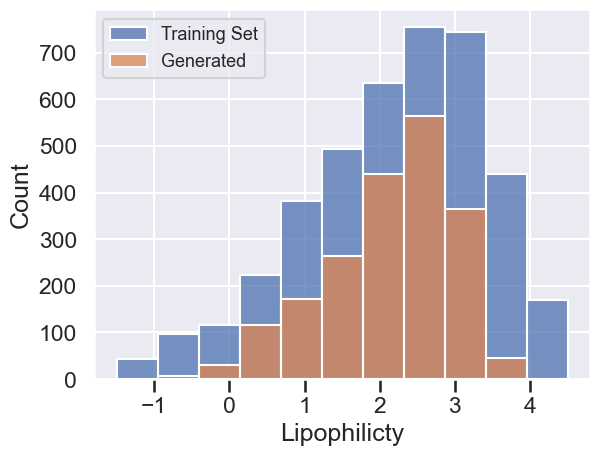

In [11]:
bins = np.histogram_bin_edges(df_train['lipo_true'], bins=11)
ax = sns.histplot(x=df_train['lipo_true'], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen['rf_lipo'], bins=bins, label='Generated')

ax.set_xlabel('Lipophilicty')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

In [12]:
df_train.describe()

,lipo_true,lipo_pred,num_atoms,molecular_weight
count,4097.000000,4097.000000,4097.000000,4097.000000
mean,2.196087,2.199289,26.995607,382.520615
std,1.199093,0.996588,7.233378,103.760856
min,-1.500000,-1.107900,7.000000,113.160000
25%,1.440000,1.598890,22.000000,306.369000
50%,2.370000,2.350489,27.000000,388.383000
75%,3.100000,2.971376,32.000000,456.912000
max,4.500000,4.364222,65.000000,974.634000


In [13]:
df_gen.describe()

,rf_lipo,num_atoms,molecular_weight
count,2003.000000,2003.000000,2003.000000
mean,2.128564,25.620569,365.167673
std,0.851234,7.315893,106.176307
min,-0.878191,7.000000,101.149000
25%,1.607863,21.000000,290.344000
50%,2.285145,25.000000,361.873000
75%,2.767539,30.000000,431.213500
max,4.022568,59.000000,846.305000


In [15]:
df_train['inchi_key'] = df_train.SMILES.apply(lambda smi: Chem.inchi.MolToInchiKey(Chem.MolFromSmiles(smi)))

In [16]:
df_gen[df_gen.inchi_key.isin(df_train.inchi_key.values)]

,SMILES,inchi_key,rf_lipo,num_atoms,molecular_weight
40,CCN(CC)S(=O)(=O)c1ccc(-c2cc(C(F)(F)F)ccc2OCC(=...,AJOOJNSIVXELDW-UHFFFAOYSA-N,0.518580,29,431.432
63,COc1ccc(C=C2SC(=O)NC2=O)cc1OC,ARJGUVIAPHIKLE-UHFFFAOYSA-N,1.292107,18,265.290
98,CN(C)CCCN1c2ccccc2CCc2ccccc21,BCGWQEUPMDMJNV-UHFFFAOYSA-N,2.542424,21,280.415
106,CC(CO)Nc1nc(SCc2cccc(F)c2F)nc2nc(N)sc12,BDGUZDOTNGSANE-UHFFFAOYSA-N,3.265834,25,383.449
117,Cc1ccc(S(=O)(=O)Nc2c(C(=O)NC(C)C(C)(C)C)c(C)nn...,BFODPUUHEITNCL-UHFFFAOYSA-N,1.684312,31,446.617
...,...,...,...,...,...
1949,CN(C)CCCN1c2ccccc2Sc2ccccc21,ZGUGWUXLJSTTMA-UHFFFAOYSA-N,2.576768,20,284.428
1958,COc1cc2ncc(C(N)=O)c(Nc3ccc(F)cc3F)c2cc1N1CCN(C...,ZJODRBGRKHPTDB-UHFFFAOYSA-N,2.273141,31,427.455
1968,CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21,ZPEIMTDSQAKGNT-UHFFFAOYSA-N,3.237606,21,318.873
1974,O=c1c(-c2ccc(O)cc2)coc2cc(O)ccc12,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,2.642476,19,254.241


In [17]:
df_non_overlap = df_gen[~df_gen.inchi_key.isin(df_train.inchi_key.values)]
df_non_overlap

,SMILES,inchi_key,rf_lipo,num_atoms,molecular_weight
0,Cc1ccc(C#N)cc1C(=NCN1CCCOC1)c1ccccc1,AABMWSHEWZJFJV-UHFFFAOYSA-N,2.273767,24,319.408
1,CC(CCc1ccccc1)NC(C)S(=O)(=O)c1ccc(OCc2ccccc2)cc1,AAIJTQZUBZOWJZ-UHFFFAOYSA-N,2.291067,30,423.578
2,O=C(O)CCC(=O)Nc1cc(CCc2ccccc2)n[nH]c1=O,AAISTNJXSFALDF-UHFFFAOYSA-N,0.186741,23,315.329
3,NC(=O)C(CCc1ccc(OCCCNc2ccccn2)cc1)C(F)(F)F,AAIVTQTUVUVWJA-UHFFFAOYSA-N,2.923300,27,381.398
4,OCCN1CCN(CCCc2c[nH]c(-c3ccccc3)n2)CC1,AAJXWLZJARCQRQ-UHFFFAOYSA-N,1.695130,23,314.433
...,...,...,...,...,...
1998,CNC(C)C(N)N1CCC(OC(=O)C(O)c2ccccc2)CC1,ZYGLLBBSQAZGNE-UHFFFAOYSA-N,0.907309,23,321.421
1999,CS(=O)(=O)c1cnc(N2CCN(C(=O)Nc3ccccc3Cl)CC2)c(F)c1,ZYHKNEZYLIFDNW-UHFFFAOYSA-N,2.573367,27,412.874
2000,CCCNc1nc(N2CCCC(C(=O)O)C2)ccc1C(=O)NC1CCCCC1,ZYPNXQUBUDHYEW-UHFFFAOYSA-N,0.892567,28,388.512
2001,Cc1cc(F)c(Cl)c(Nc2cc(C(=O)N3CCOCC3)cc(N3CCOCC3...,ZZBCGDCXFCMVKR-UHFFFAOYSA-N,3.066878,30,434.899


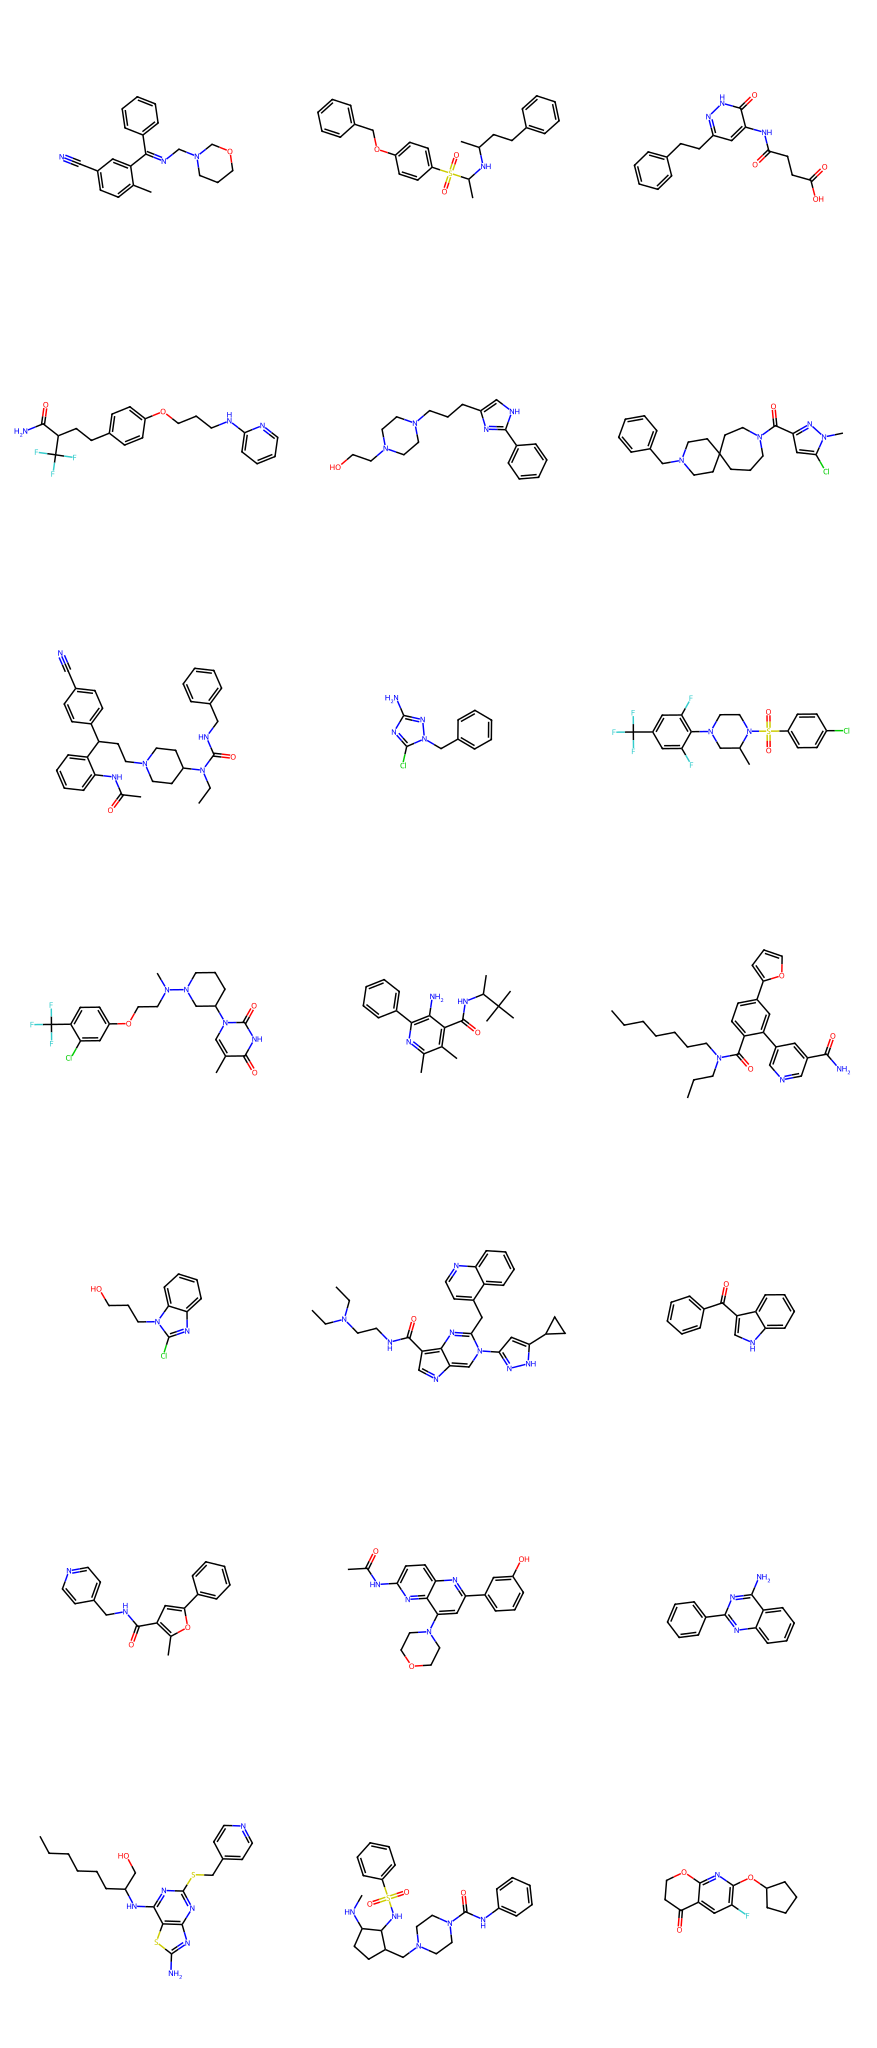

In [18]:
# inspect some of the generated molecule
size = 400
img = Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in df_non_overlap.SMILES.values[:21]], subImgSize=(size, size), useSVG=True)
img

In [ ]:
# with open('gen_model/sample_generated_smiles_prior.svg', 'w') as f:
#     f.write(img.data)